# EDA步骤
1、数据规模？

2、目标分布？

3、是否严重偏态？

4、缺失值情况？

5、数值特征相关性？

6、类别特征占比？

## 一、读取数据
训练集为1460*81，80个特征和1个目标变量

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("../data/raw/train.csv")
print(train.shape)
print(train.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

## 二、目标变量分布
目标变量房价分布右偏，为了解决异方差问题，需要对其做log变换，使其更接近正态。

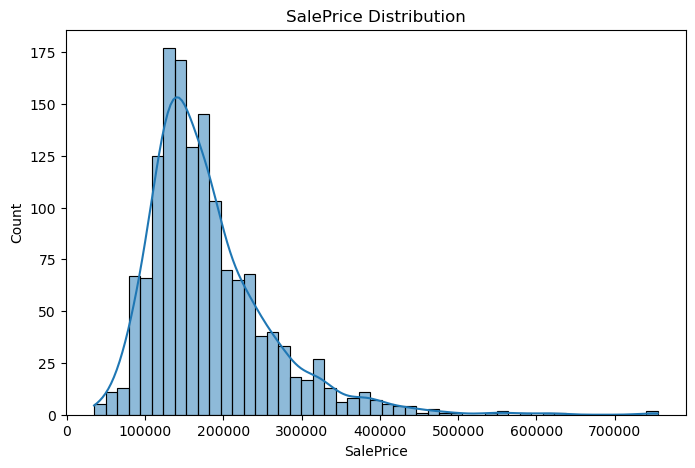

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(train['SalePrice'],kde=True)
plt.title("SalePrice Distribution")
plt.show()

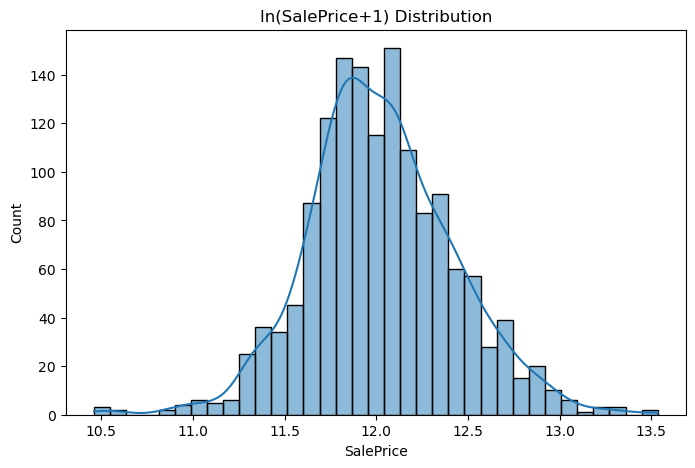

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train['SalePrice']),kde=True)
plt.title("ln(SalePrice+1) Distribution")
plt.show()

log变换后明细更接近正态分布

## 三、缺失值分析

PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage缺失值较多，在数据预处理阶段可以使用均值插值法填补

In [16]:
missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
missing.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

## 四、数值特征相关性
GrLivArea,GarageArea,IstFIrSF相关性较高

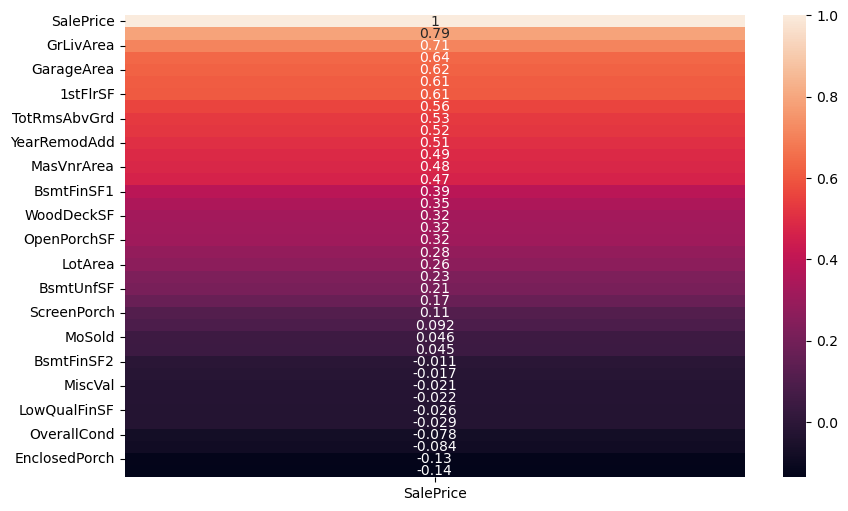

In [39]:
numberic_feature = train.select_dtypes(include=[np.number])
corr = numberic_feature.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False),annot=True)
plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

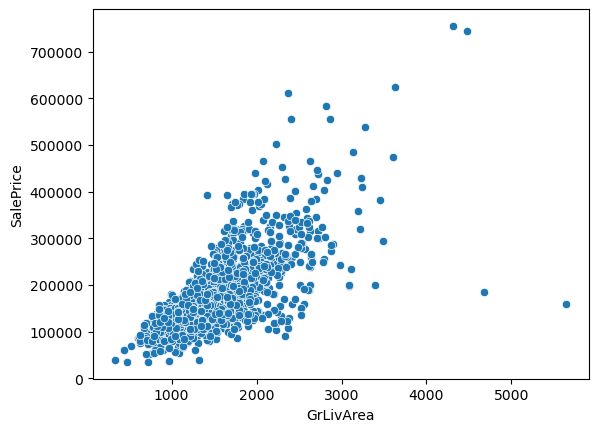

In [41]:
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

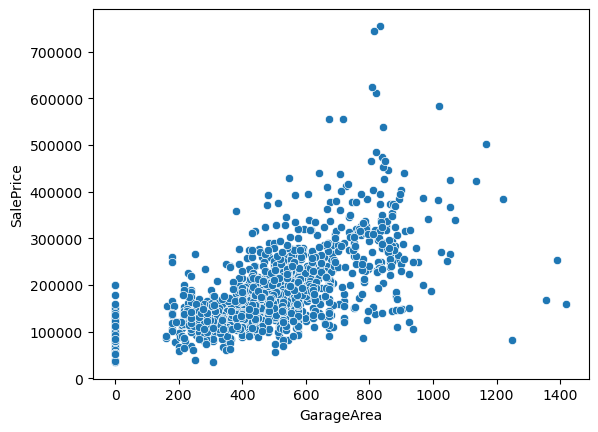

In [44]:
sns.scatterplot(x="GarageArea", y="SalePrice", data=train)

GrLivArea,GarageArea,IstFIrSF相关性较高，比较其中两个的散点图，可以看到特征和目标变量之间具有明显线性趋势

## 五、类别变量占比
类别变量共43个，占比53%。

考虑使用XGBoost直接处理类别数据，PyTorch MLP必须one-hot，one-hot 后维度可能变成 300+，可能会出现维度爆炸

In [50]:
obj = train.select_dtypes(include="object").columns
print(obj)
print(len(obj),len(obj)/len(train.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43 0.5308641975308642
